### Instead of resampling randoms, weigh randoms by their fc. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from imaginglss.utils import output

In [3]:
import sys; sys.path.insert(0, '/global/homes/e/elliek/kdcount')

from kdcount import KDTree, KDAttr
from kdcount.utils import constant_array

import healpy

import numpy as np
from numpy.testing import assert_equal, run_module_suite
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
rcParams["image.interpolation"] = "nearest"
rcParams["image.aspect"] = "equal"

In [4]:
gal_n = output.read_text('/global/homes/y/yfeng1/m779/imaginglss/object_cats/QSO/QSO.txt', 'NOISES')

In [5]:
gal_f = output.read_text('/global/homes/y/yfeng1/m779/imaginglss/object_cats/QSO/QSO.txt', 'FLUXES')

In [6]:
ran_fc = output.read_text('/global/homes/y/yfeng1/m779/imaginglss/random_cats/QSO/QSO_rand.txt', 'FC')

In [9]:
ran_n = output.read_text('/global/homes/y/yfeng1/m779/imaginglss/random_cats/QSO/QSO_rand.txt', 'NOISES')

In [20]:
def hpmean(nside, ra, dec, value):
    return hpsum(nside, ra, dec, value) / hpsum(nside, ra, dec)
def hpsum(nside, ra, dec, value=None):
    p = healpy.ang2pix(nside, numpy.radians(90 - dec), numpy.radians(ra))
    npix = healpy.nside2npix(nside)
    w = numpy.bincount(p, weights=value, minlength=npix)
    return w

In [22]:
gal_conf = gal_f['DECAM_INTRINSIC_FLUX'] / gal_n['DECAM_INTRINSIC_NOISE_LEVEL']

In [78]:
confident_gal_mask = (gal_conf[:, 1] > 5)
confident_gal_mask &= (gal_conf[:, 2] > 5)
confident_gal_mask &= (gal_conf[:, 4] > 3)

In [79]:
meanfc = hpmean(128, ran_n['RA'], ran_n['DEC'], ran_fc['COMPLETENESS'])
gal_density = hpsum(128, gal_f['RA'][confident_gal_mask], gal_f['DEC'][confident_gal_mask])
ran_density = hpsum(128, ran_n['RA'], ran_n['DEC'], ran_fc['COMPLETENESS'])

In [80]:
norm = (gal_density / ran_density)[meanfc>0.9].mean()

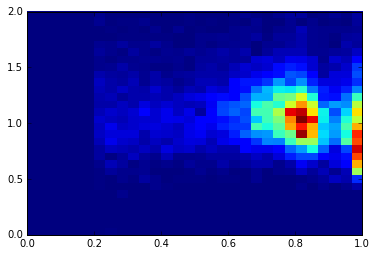

In [81]:
#_ = hist2d(gal_density, ran_density, bins=(100, 100), norm=matplotlib.colors.LogNorm())
_ = hist2d(meanfc[meanfc> 0.2], (gal_density / ran_density / norm)[meanfc>0.2], 
           bins=(30, 30), range=((0, 1), (0, 2)))

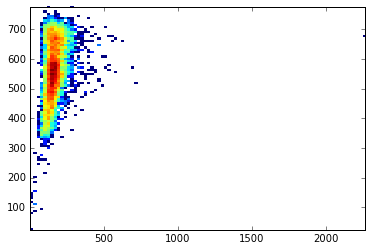

In [49]:
#_ = hist2d(gal_density, ran_density, bins=(100, 100), norm=matplotlib.colors.LogNorm())
_ = hist2d(gal_density[meanfc > 0.5], ran_density[meanfc>0.5], bins=(100, 100), norm=matplotlib.colors.LogNorm())

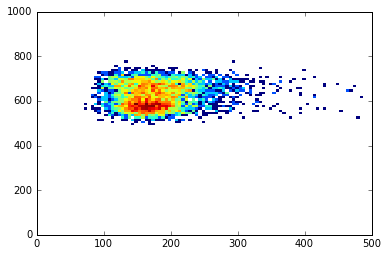

In [51]:
h_ = hist2d(gal_density[meanfc > 0.8], ran_density[meanfc>0.8], bins=(100, 100), range=((0, 500),(0, 1000)),  norm=matplotlib.colors.LogNorm())

In [34]:
nran = ran_fc['COMPLETENESS'].sum()

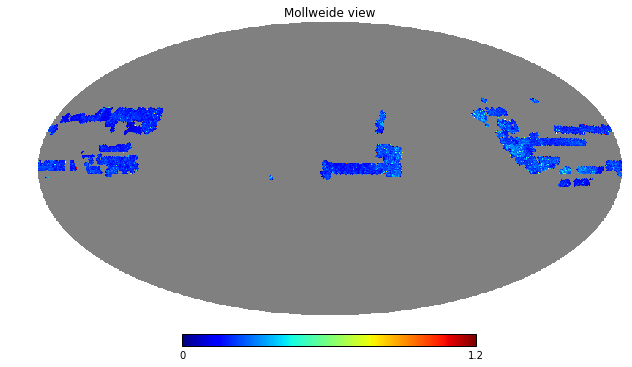

In [77]:
healpy.mollview(gal_density / ran_density, min=0, max=1.2)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


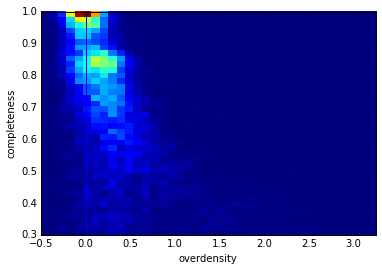

In [145]:
_ = hist2d((1.0 * ngal / nran * nran[meanfc>0.90].sum() / ngal[meanfc>0.90].sum() - 1)[mask2], 
        meanfc[mask2], bins=(40, 40),)
        #norm=matplotlib.colors.LogNorm())
axvline(0)
xlabel('overdensity')
ylabel('completeness')

In [ ]:
healpy.mollview(1.0 * ngal / nran * nran.sum() / ngal.sum() - 1, max=1, rot=(-120,0,0), title='ELGs')